# Pyber Challenge

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
import matplotlib as plt
import pandas as pd

In [3]:
# Read the city and ride data
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [16]:
# Merge datasets on common key
pyber_data_df = pd.merge(city_data_df, ride_data_df, how="left", on="city")
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [17]:
#1 Get total rides for each city type
total_rides_per_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_per_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [18]:
#2 Get total drivers for each city type
total_drivers_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_per_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [19]:
#3 Get total fares for each city type
total_fares_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [20]:
#4 Get the average fare per ride for each city type
avg_fare_per_ride = total_fares_city_type / total_rides_per_city_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [21]:
#5 Get the average fare per driver
avg_fare_per_driver = total_fares_city_type / total_drivers_per_city_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [22]:
pyber_ride_summary_df = {
    "Total Rides": total_rides_per_city_type,
    "Total Drivers": total_drivers_per_city_type,
    "Total Fares": total_fares_city_type,
    "Average Fares Per Ride": avg_fare_per_ride,
    "Average Fares Per Driver": avg_fare_per_driver
}
pyber_ride_summary_df = pd.DataFrame(pyber_ride_summary_df)

In [23]:
# Format the columns
pyber_ride_summary_df["Total Rides"] = pyber_ride_summary_df["Total Rides"].map("{:,}".format)
pyber_ride_summary_df["Total Drivers"] = pyber_ride_summary_df["Total Drivers"].map("{:,}".format)
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fares Per Ride"] = pyber_ride_summary_df["Average Fares Per Ride"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fares Per Driver"] = pyber_ride_summary_df["Average Fares Per Driver"].map("${:,.2f}".format)

In [24]:
pyber_ride_summary_df.index.name = ""
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares Per Ride,Average Fares Per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [25]:
# Rename Columns and set index to date
pyber_data_df = pyber_data_df.rename(columns={
    "city": "City",
    "date": "Date",
    "fare": "Fare",
    "driver_count":"Number of Drivers",
    "ride_id":"Ride ID",
    "type":"City Type"  
})
pyber_data_df

,City,Number of Drivers,City Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [27]:
# Create a  line plot showing the sum of the fares for each type of city
#1 Extract only Date, CityType and Fare columns - new df
pyber_data_df.set_index(pyber_data_df["Date"], inplace=True)
pyber_data_df

columns = ["Date", "City Type", "Fare"]
pyber_cities_fares = pyber_data_df[columns].copy()
# Drop extra column
pyber_cities_fares.drop(["Date"], axis=1, inplace=True)

# Datetime info
pyber_cities_fares.index = pd.to_datetime(pyber_data_df.index)
pyber_cities_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-02-24 08:40:38 to 2019-04-12 18:11:50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [44]:
# Calculate sum of fares by type of city and date using groupby
fares_sum_by_type = pyber_cities_fares.groupby(["City Type", "Date"]).sum()["Fare"]
fares_sum_by_type = pd.DataFrame(fares_sum_by_type)
fares_sum_by_type = fares_sum_by_type.reset_index()
fares_sum_by_type

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [46]:
# Pivot Table - date as indeox, columns as type, fare in rows
fares_sum_by_type_pivot = fares_sum_by_type.pivot(index="Date",columns="City Type")["Fare"]
fares_sum_by_type_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [48]:
# Create line chart - Fares from 01/2019 - 04/2019
Jan2April_fares = fares_sum_by_type_pivot.loc['2019-01-01':'2019-04-30']
Jan2April_fares

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-30 19:54:09,NaN,NaN,29.84
2019-04-30 20:45:11,NaN,22.26,NaN
2019-04-30 21:26:22,37.33,NaN,NaN


In [65]:
# New df with fares sum by week
weekly_fares_df = Jan2April_fares.resample("W").sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


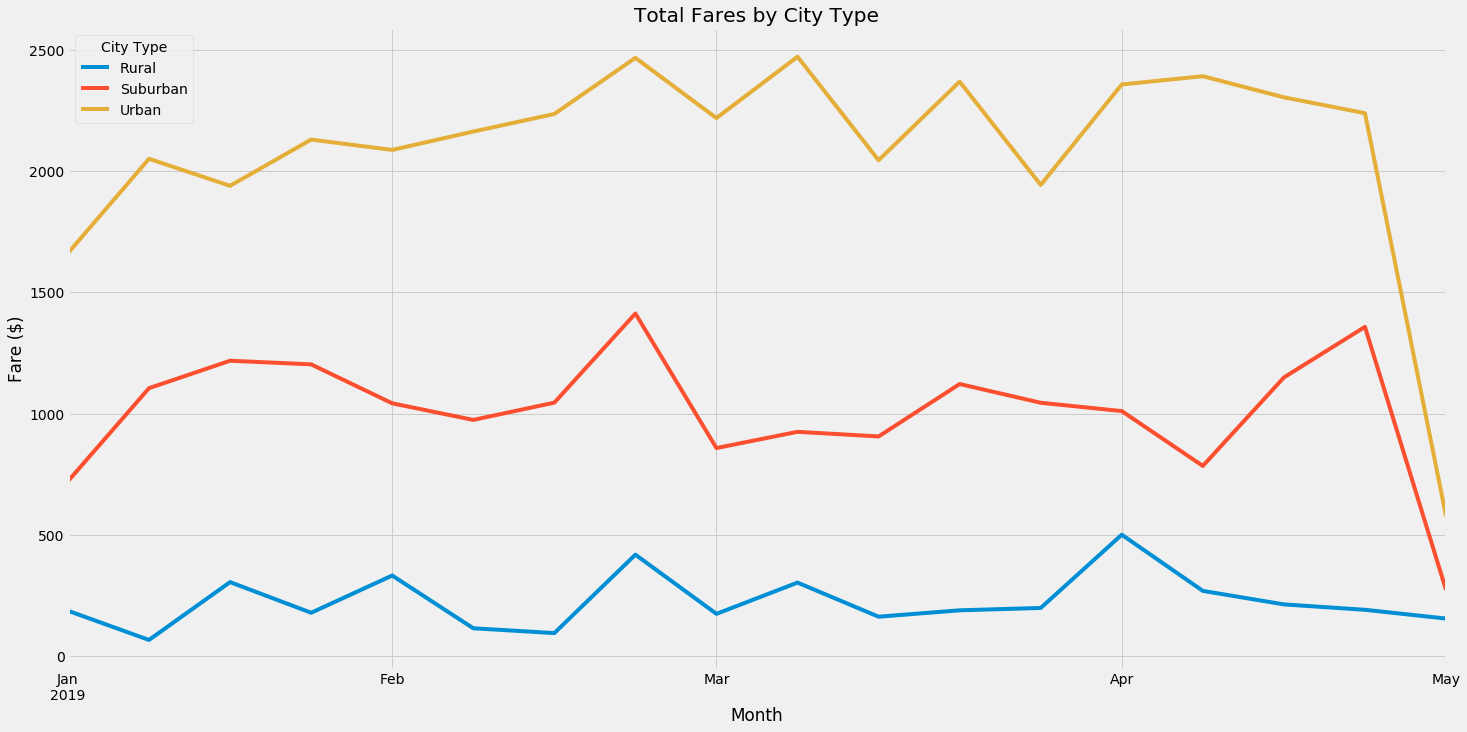

In [79]:
# PLOT using labels and titles
from matplotlib import style
import matplotlib.pyplot as plt

style.use("fivethirtyeight")

ax = weekly_fares_df.plot(figsize=(22,11))
ax.set_title("Total Fares by City Type")
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($)")
plt.savefig("./Challenge_fares_summary.png")
plt.show()